# **Automatidata project**
Regression Analysis by Mariano Gattesco

## Multiple linear regression model

## PACE: **Plan**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

## PACE: **Analyze**

### Explore data with EDA

In [3]:
print(df0.shape)
df0.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [4]:
print(df0.isna().sum())
print()
print("duplicated: " ,df0.duplicated().sum())
df0.drop_duplicates()
df0.dropna()
df0.isna().sum()


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

duplicated:  0


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Convert columns

In [6]:
print(df0[["tpep_pickup_datetime","tpep_dropoff_datetime"]].dtypes)
df0["tpep_pickup_datetime"][:2]

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


0    03/25/2017 8:55:43 AM
1    04/11/2017 2:53:28 PM
Name: tpep_pickup_datetime, dtype: object

In [7]:
df0["tpep_pickup_datetime"] = pd.to_datetime(df0["tpep_pickup_datetime"],format='%m/%d/%Y %H:%M:%S %p')
df0["tpep_dropoff_datetime"] = pd.to_datetime(df0["tpep_dropoff_datetime"],format='%m/%d/%Y %H:%M:%S %p')
df0[["tpep_pickup_datetime","tpep_dropoff_datetime"]].dtypes

df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Create duration column

In [8]:
from datetime import datetime
import datetime as dt

df0["duration"] = df0["tpep_dropoff_datetime"]-df0["tpep_pickup_datetime"]
df0["duration"] = df0["duration"].astype('m8[m]')
df0["duration"].head()



0    14.0
1    26.0
2     7.0
3    30.0
4    16.0
Name: duration, dtype: float64

In [9]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Box plots outliers

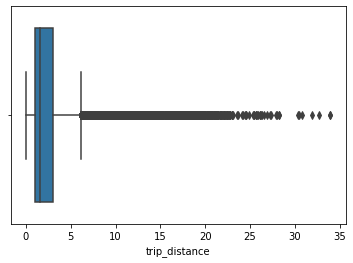

In [10]:
sns.boxplot(x=df0["trip_distance"])
plt.show()

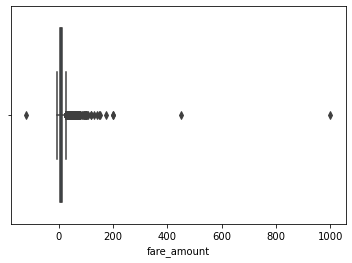

In [11]:
sns.boxplot(x=df0["fare_amount"])
plt.show()

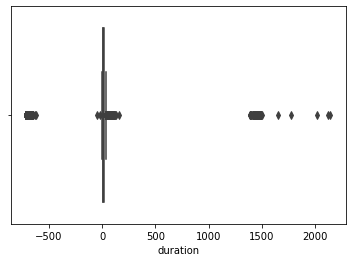

In [12]:
sns.boxplot(x=df0["duration"])
plt.show()

### Imputations

#### `trip_distance` outliers

In [13]:
df0.sort_values(by= "trip_distance",ascending=True)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.00,1,N,41,264,2,10.50,0.0,0.5,0.00,0.00,0.3,11.30,0.0
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.00,1,N,246,264,2,8.00,0.0,0.5,0.00,0.00,0.3,8.80,0.0
6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.00,5,N,61,61,1,18.00,0.0,0.0,2.00,0.00,0.3,20.30,0.0
13561,14504365,1,2017-02-23 04:06:31,2017-02-23 04:06:54,2,0.00,5,N,175,175,3,32.00,0.0,0.0,0.00,0.00,0.3,32.30,0.0
12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.00,1,N,145,145,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,94052446,2,2017-11-06 08:30:50,2017-11-07 12:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,1649.0
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.0
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 01:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,-653.0
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.0


In [14]:
df_trip_0 = df0[df0["trip_distance"]==0]
df_trip_0["trip_distance"].value_counts()


0.0    148
Name: trip_distance, dtype: int64

#### `fare_amount` outliers

In [15]:
print(df0["fare_amount"].sort_values(ascending=True))
print()
df_fare_0 = df0[df0["fare_amount"]<=0]
print(df_fare_0["fare_amount"].value_counts())



12944   -120.00
11204     -4.50
20698     -4.50
14714     -4.00
17602     -4.00
          ...  
12511    175.00
15474    200.00
13861    200.01
20312    450.00
8476     999.99
Name: fare_amount, Length: 22699, dtype: float64

 0.0      6
-2.5      4
-3.5      3
-3.0      2
-4.5      2
-4.0      2
-120.0    1
Name: fare_amount, dtype: int64


In [16]:
print("Min: ",df0["fare_amount"].min())
df0.loc[df0["fare_amount"]<=0,"fare_amount"]=0
print("New Min: ",df0["fare_amount"].min())

Min:  -120.0
New Min:  0.0


In [17]:

def outlier(df,column_list, iqr_factor):
    for col in column_list:
      
        df.loc[df[col] < 0, col] = 0
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()
    
outlier(df0,['fare_amount'],6)



fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



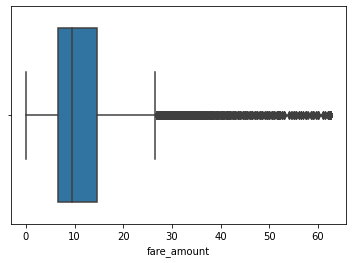

In [18]:
sns.boxplot(x=df0["fare_amount"])
plt.show()

#### `duration` outliers


In [19]:
df0["duration"].sort_values(ascending=False)

14322    2144.0
5478     2119.0
8195     2018.0
5051     1772.0
29       1649.0
          ...  
12314    -717.0
4987     -717.0
18119    -718.0
1307     -718.0
20129    -718.0
Name: duration, Length: 22699, dtype: float64

In [20]:
df0.loc[df0["duration"]<0,"duration"]=0
df0["duration"].min()

0.0

In [21]:
outlier(df0,['duration'],6)

duration
q3: 18.0
upper_threshold: 90.0
count    22699.000000
mean        14.201066
std         13.821152
min          0.000000
25%          6.000000
50%         10.000000
75%         18.000000
max         90.000000
Name: duration, dtype: float64



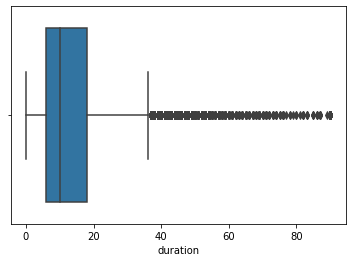

In [22]:
sns.boxplot(x=df0["duration"])
plt.show()

### Feature engineering

#### Create `mean_distance` column

In [23]:
df0["pickup_dropoff"]=df0.PULocationID.astype(str) + "-" + df0.DOLocationID.astype(str)
df0["pickup_dropoff"].head()

0    100-231
1     186-43
2    262-236
3     188-97
4      4-112
Name: pickup_dropoff, dtype: object

In [24]:
grouped = df0.groupby(["pickup_dropoff"])["trip_distance"].mean()
grouped.head()

pickup_dropoff
1-1         2.433333
10-148     15.700000
100-1      16.890000
100-100     0.253333
100-107     1.180000
Name: trip_distance, dtype: float64

In [25]:
grouped_dict = grouped.to_dict()
grouped_dict


{'1-1': 2.433333333333333,
 '10-148': 15.7,
 '100-1': 16.89,
 '100-100': 0.25333333333333335,
 '100-107': 1.18,
 '100-113': 2.024,
 '100-114': 1.94,
 '100-12': 4.55,
 '100-125': 2.84,
 '100-13': 4.201666666666667,
 '100-132': 17.2175,
 '100-137': 1.299,
 '100-138': 10.432857142857143,
 '100-140': 2.746,
 '100-141': 2.11,
 '100-142': 1.6958333333333335,
 '100-143': 1.5825,
 '100-144': 3.0066666666666664,
 '100-148': 4.1066666666666665,
 '100-151': 3.668,
 '100-152': 4.9,
 '100-158': 1.938,
 '100-161': 0.9813888888888889,
 '100-162': 1.2163636363636363,
 '100-163': 1.2656,
 '100-164': 0.841,
 '100-166': 5.199999999999999,
 '100-170': 0.8548,
 '100-177': 12.0,
 '100-181': 9.34,
 '100-186': 0.6404761904761904,
 '100-193': 4.39,
 '100-198': 9.01,
 '100-202': 5.3,
 '100-209': 4.43,
 '100-211': 2.48,
 '100-224': 1.9500000000000002,
 '100-225': 7.5,
 '100-229': 1.7850000000000001,
 '100-230': 0.72975,
 '100-231': 3.5216666666666665,
 '100-232': 3.8449999999999998,
 '100-233': 1.245833333333333

In [26]:
df0["mean_distance"] = df0["pickup_dropoff"]

df0["mean_distance"] = df0["mean_distance"].map(grouped_dict)

df0[["pickup_dropoff","mean_distance"]].sort_values("pickup_dropoff")

,pickup_dropoff,mean_distance
6485,1-1,2.433333
13359,1-1,2.433333
3582,1-1,2.433333
7867,10-148,15.700000
13496,100-1,16.890000
...,...,...
17995,97-80,3.840000
2842,97-90,4.420000
15337,97-97,1.006667
19619,97-97,1.006667


#### Create `mean_duration` column

In [27]:
grouped_duration = df0.groupby(["pickup_dropoff"])["duration"].mean()

grouped_duration_dict = grouped_duration.to_dict()

df0["mean_duration"] = df0["pickup_dropoff"]
df0["mean_duration"] = df0["mean_duration"].map(grouped_duration_dict)

df0[["pickup_dropoff","mean_duration"]].sort_values("pickup_dropoff")

,pickup_dropoff,mean_duration
6485,1-1,0.000000
13359,1-1,0.000000
3582,1-1,0.000000
7867,10-148,69.000000
13496,100-1,48.000000
...,...,...
17995,97-80,23.000000
2842,97-90,11.000000
15337,97-97,33.333333
19619,97-97,33.333333


#### Create `day` and `month` columns

In [28]:
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
df0["time_start"] = [time.time() for time in df0["tpep_pickup_datetime"]]

df0["time_finished"] = pd.to_datetime(df0["tpep_dropoff_datetime"]).dt.time

print(df0[["day","month","time_start","time_finished"]].dtypes)
print(df0[["day","month","time_start","time_finished"]])


day              object
month            object
time_start       object
time_finished    object
dtype: object
            day      month time_start time_finished
0      Saturday      March   08:55:43      09:09:47
1       Tuesday      April   02:53:28      03:19:58
2        Friday   December   07:26:56      07:34:08
3        Sunday        May   01:17:59      01:48:14
4      Saturday      April   11:32:20      11:49:03
...         ...        ...        ...           ...
22694    Friday   February   05:37:23      05:40:39
22695    Sunday     August   04:43:59      05:24:47
22696    Monday  September   02:54:14      02:58:22
22697  Saturday       July   12:56:30      01:08:26
22698  Thursday      March   01:02:49      01:16:09

[22699 rows x 4 columns]


In [29]:
print(type(df0["time_start"][0]))

df0["time_start"] = df0["time_start"].astype(str)

print(type(df0["time_start"][0]))
df0["time_start"][1][:2]


<class 'datetime.time'>
<class 'str'>


'02'

#### Create `rush_hour` column

In [30]:
df0["hour"] = df0["time_start"].str[0:2]
df0["hour"] = df0["hour"].astype(int)

def rush(row):
    if row["day"] == "Sunday" or row["day"] == "Saturday" and row["hour"] < 6 or row["hour"] > 10 and row["hour"] < 16 or row["hour"] > 20:
        return 0
    else:
        return 1

df0 = df0.assign(rush_hour = df0.apply(rush, axis = 1))
    

df0["hour"].head()

0     8
1     2
2     7
3     1
4    11
Name: hour, dtype: int64

In [31]:

df0[["day","month","time_start","time_finished","rush_hour"]]

,day,month,time_start,time_finished,rush_hour
0,Saturday,March,08:55:43,09:09:47,1
1,Tuesday,April,02:53:28,03:19:58,1
2,Friday,December,07:26:56,07:34:08,1
3,Sunday,May,01:17:59,01:48:14,0
4,Saturday,April,11:32:20,11:49:03,0
...,...,...,...,...,...
22694,Friday,February,05:37:23,05:40:39,1
22695,Sunday,August,04:43:59,05:24:47,0
22696,Monday,September,02:54:14,02:58:22,1
22697,Saturday,July,12:56:30,01:08:26,0


### Scatter plot

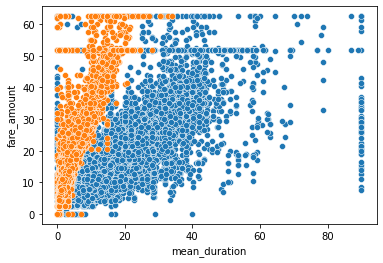

In [33]:
sns.scatterplot(x = df0['mean_duration'], y = df0['fare_amount'])
sns.scatterplot(x = df0['mean_distance'], y = df0['fare_amount'])
plt.show()

In [34]:
df0[df0["fare_amount"]>50]["fare_amount"].value_counts().head(3)

52.0    514
62.5     84
59.0      9
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [35]:
df_fare52 = df0[df0['fare_amount']==52]

In [36]:
df_fare52.groupby('PULocationID')['PULocationID'].count().sort_values(ascending=False)


PULocationID
132    292
264     15
163     13
170     13
230      9
      ... 
140      1
145      1
148      1
151      1
265      1
Name: PULocationID, Length: 62, dtype: int64

In [37]:
df_loc = df_fare52.loc[(df_fare52['PULocationID'] == 132) | (df_fare52['DOLocationID'] == 132)]
df_loc['fare_amount'].count()

459

Of the 512 trips with a cost = 52, 459 start and/or end at Location 132 (almost 90%) so it is not an error but rather a cost of going to or leaving that location.

### Isolate modeling variables

In [38]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Pair plot

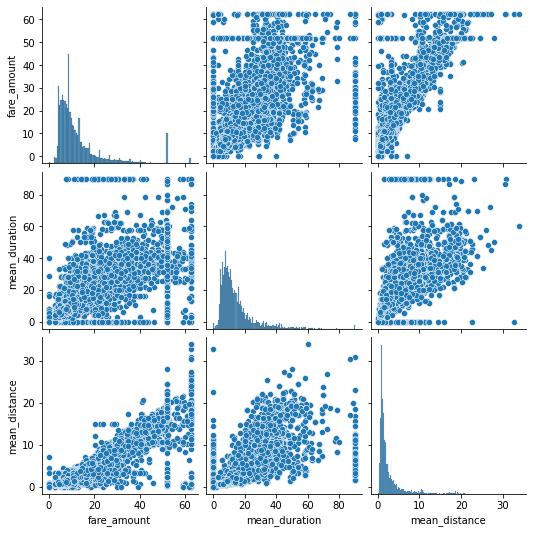

In [39]:
sns.pairplot(df0, vars=["fare_amount","mean_duration", "mean_distance"])
plt.show()


### Identify correlations

In [40]:
df1 = df0[["fare_amount","mean_duration", "mean_distance","rush_hour","VendorID","passenger_count"]]
print(df1.head(5))
df1.corr(method = "pearson")

   fare_amount  mean_duration  mean_distance  rush_hour  VendorID  \
0         13.0      18.333333       3.521667          1         2   
1         16.0      21.000000       3.108889          1         1   
2          6.5       6.571429       0.881429          1         1   
3         20.5      30.000000       3.700000          0         2   
4         16.5      14.000000       4.435000          0         2   

   passenger_count  
0                6  
1                1  
2                1  
3                1  
4                1  


,fare_amount,mean_duration,mean_distance,rush_hour,VendorID,passenger_count
fare_amount,1.000000,0.789662,0.910185,-0.008275,0.001045,0.014942
mean_duration,0.789662,1.000000,0.804701,-0.022960,0.003718,0.013520
mean_distance,0.910185,0.804701,1.000000,-0.021921,0.004741,0.013428
rush_hour,-0.008275,-0.022960,-0.021921,1.000000,0.001022,-0.020465
VendorID,0.001045,0.003718,0.004741,0.001022,1.000000,0.266463
passenger_count,0.014942,0.013520,0.013428,-0.020465,0.266463,1.000000


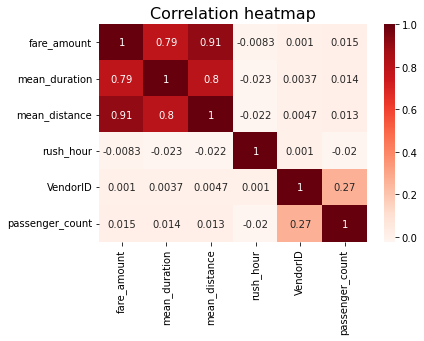

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap', fontsize=16)
plt.show()

Indeed this confirms a strong correlation between mean_distance and mean_duration. In any case, both variables are left in the model to analyze the resulting coefficients.

## PACE: **Construct**

#### Split data into outcome variable and features

In [43]:
X = df1.drop(columns=['fare_amount'])

y = df1[["fare_amount"]]

X

,mean_duration,mean_distance,rush_hour,VendorID,passenger_count
0,18.333333,3.521667,1,2,6
1,21.000000,3.108889,1,1,1
2,6.571429,0.881429,1,1,1
3,30.000000,3.700000,0,2,1
4,14.000000,4.435000,0,2,1
...,...,...,...,...,...
22694,13.964286,1.098214,1,2,3
22695,58.875000,18.757500,0,2,1
22696,6.151515,0.684242,1,2,1
22697,14.500000,2.077500,0,2,1


### Pre-process data


In [44]:
X["VendorID"] = X["VendorID"].astype(str) 
print(X.info())

X = pd.get_dummies(X,drop_first=True)
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_duration    22699 non-null  float64
 1   mean_distance    22699 non-null  float64
 2   rush_hour        22699 non-null  int64  
 3   VendorID         22699 non-null  object 
 4   passenger_count  22699 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 886.8+ KB
None


,mean_duration,mean_distance,rush_hour,passenger_count,VendorID_2
0,18.333333,3.521667,1,6,1
1,21.000000,3.108889,1,1,0
2,6.571429,0.881429,1,1,0
3,30.000000,3.700000,0,1,1
4,14.000000,4.435000,0,1,1
...,...,...,...,...,...
22694,13.964286,1.098214,1,3,1
22695,58.875000,18.757500,0,1,1
22696,6.151515,0.684242,1,1,1
22697,14.500000,2.077500,0,1,1


### Split data into training and test sets

In [45]:
X = X.drop(columns=['VendorID_2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

In [46]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler().fit(X_train)
X_train_ok = standardize.transform(X_train)
X_train_ok

array([[ 0.16361495,  0.8694684 , -1.39669744, -0.50301524],
       [-0.66401338, -0.60011281,  0.71597468, -0.50301524],
       [-0.53276433, -0.47829156, -1.39669744,  0.27331093],
       ...,
       [-0.68998916, -0.45121122,  0.71597468, -0.50301524],
       [-0.8101771 , -0.58944763,  0.71597468, -0.50301524],
       [ 0.81053177,  0.83673851,  0.71597468,  1.82596329]])

### Fit the model

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_ok, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate model

In [48]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
r_sq = lr.score(X_train_ok, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_ok)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8323548987118882
R^2: 0.8323548987118882
MAE: 2.336387552177198
MSE: 18.726216654508907
RMSE: 4.327379883313794


### Test data

In [49]:
X_test_ok = standardize.transform(X_test)

In [50]:
r_sq_test = lr.score(X_test_ok, y_test)
print('Coefficient of determination: ', r_sq_test)
y_pred_test = lr.predict(X_test_ok)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination:  0.8605425785222975
R^2: 0.8605425785222975
MAE: 2.2759868365142184
MSE: 15.16551956570878
RMSE: 3.894293204897235


## PACE: **Execute**

### Results

In [51]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.426200,1.573800
18134,28.0,15.009347,12.990653
4655,5.5,6.872836,-1.372836
7378,15.5,16.810616,-1.310616
13914,9.5,10.417324,-0.917324


### Visualize model results

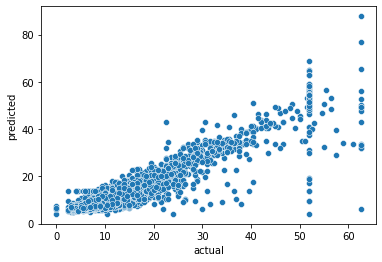

In [52]:
sns.scatterplot(x='actual',
                y='predicted',
                data=results)

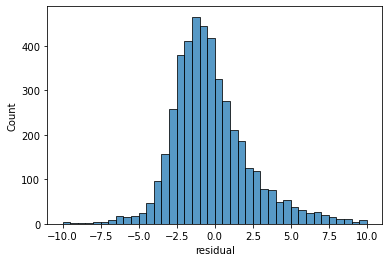

In [53]:
sns.histplot(results['residual'],bins=np.arange(-10,10.5,0.5))

In [54]:
results["residual"].mean()

0.017369532158600393

Create a scatterplot of `residuals` over `predicted`.

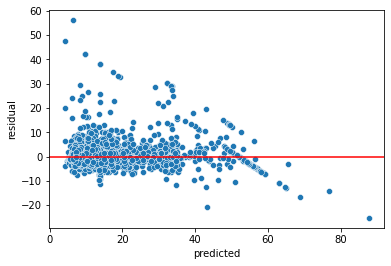

In [55]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')

### Coefficients

In [56]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,mean_duration,mean_distance,rush_hour,passenger_count
0,1.695075,8.236757,0.119882,0.021782


A coefficient of 8.236757 clearly shows the mean_distance as the variable with the greatest impact on the fare_amount in this model.